In [54]:
from IPython.display import display
from time import time
import numpy as np
import math as math
import pandas as pd
import random
import warnings
import skr as skr
import networkx as nx
import matplotlib.pyplot as plt
import time as tm
warnings.filterwarnings("ignore")

In [55]:
from PIL import Image, ImageDraw, ImageFont

def drawing_scheduling(sch_x, sch_y):

    f_aph = {}
    for (i,j) in E:
        for key in sch_x.keys():
            if i == key[0]:
                for value in sch_x[key]:
                    for key2 in sch_y.keys():
                        if j == key2[0]:
                            for value2 in sch_y[key2]:
                                if value == value2:
                                    f_aph[(i,j,key[1],key[1],value)] = 1

    Tx = {(n,x): [] for x in range(1, max_dev_node + 1) for n in aux_N}
    Rx = {(n,y): [] for y in range(1, max_dev_node + 1) for n in aux_N}
    
    for idx in f_aph.keys():
        if f_aph[idx] == 1:
            color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            Tx[(idx[0],idx[2])].append((idx[4][0],idx[4][1],color))
            Rx[(idx[1],idx[3])].append((idx[4][0],idx[4][1],color))

    # Set the size of each rectangle
    rectangle_size = (1500, 75*len(aux_N)*max(len(X), len(Y)))
    
    # Create an image with a white background
    image_size = (rectangle_size[0], rectangle_size[1])
    image = Image.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # Draw text in the first, second and third column
    column_1 = "Node"
    column_2 = "QKD Tx"
    column_3 = "QKD Rx"
    position_column_1 = (25,0)
    position_column_2 = (350,0)
    position_column_3 = (1075,0)
    
    
    # Define font size and load the font
    font_size = 15  # Adjust font size as needed
    font = ImageFont.load_default(font_size)

    # Draw text in the first, second and third column with increased font size
    draw.text(position_column_1, column_1, font=font, fill="black")
    draw.text(position_column_2, column_2, font=font, fill="green")
    draw.text(position_column_3, column_3, font=font, fill="red")

    y_start = 0
    for n in aux_N:
        for idx in range(1,max_dev_node + 1):

            # Draw black lines surrounding subrectangles
            draw.rectangle([80, y_start + 20, 720, y_start + 60], outline="black", width=2)  
            draw.rectangle([780, y_start + 20, 1420, y_start + 60], outline="black", width=2)
            
            # Draw text of nodes
            text_position = (position_column_1[0] + 5, y_start + 25)
            draw.text(text_position, f"{n}.{idx}",font=font, fill="black")
            text_position = (740, y_start + 25)
            draw.text(text_position, f"{n}.{idx}",font=font, fill="black")

            y_start += 70 
            

        draw.line([0, y_start + 10,1500, y_start + 10], fill="black", width=1) 

    y_start = 0
    # Draw rectangles with names and labels
    for n in aux_N:
        for x in range(1,max_dev_node + 1):
            if len(Tx[(n,x)]) != 0:
                for it in Tx[(n,x)]:
                    rectangle_x_start_left = 80 + 640*it[0]
                    rectangle_y_start_left = y_start + 20 
                    rectangle_x_end_left = rectangle_x_start_left + 640*(it[1] - it[0])
                    rectangle_y_end_left = y_start + 60
                    draw.rectangle([rectangle_x_start_left, rectangle_y_start_left, rectangle_x_end_left, rectangle_y_end_left], fill=it[2], outline="black", width=2)
                    draw.text((rectangle_x_start_left, rectangle_y_end_left +5), f"{it[0]}", fill="black")
                    draw.text((rectangle_x_end_left, rectangle_y_start_left -10), f"{it[1]}", fill="black")
            y_start += 70

    y_start = 0
    for n in aux_N:    
        for y in range(1,max_dev_node + 1):
            if len(Rx[(n,y)]) != 0:
                for it in Rx[(n,y)]:
                    rectangle_x_start_right = 780 + 640*it[0]
                    rectangle_y_start_right = y_start + 20  
                    rectangle_x_end_right = rectangle_x_start_right + 640*(it[1] - it[0])
                    rectangle_y_end_right = y_start + 60
                    draw.rectangle([rectangle_x_start_right, rectangle_y_start_right, rectangle_x_end_right, rectangle_y_end_right], fill=it[2], outline="black", width=2)
                    draw.text((rectangle_x_start_right, rectangle_y_end_right +5), f"{it[0]}", fill="black")
                    draw.text((rectangle_x_end_right, rectangle_y_start_right -10), f"{it[1]}", fill="black")
            y_start += 70                       
        
    # Display the image
    display(image)

Rows: 6, Columns: 6
Number of nodes = 6
N = {0, 1, 2, 3, 4, 5}
Number of edges = 6
E = [(0, 1), (1, 2), (1, 4), (2, 3), (3, 4), (3, 5)]
Longest distance in the network = 80 km
L = {(0, 1): 80, (1, 2): 32, (1, 4): 19, (2, 3): 16, (3, 4): 6, (3, 5): 70}
Maximum degree of the graph: 3
Average degree: 2.0


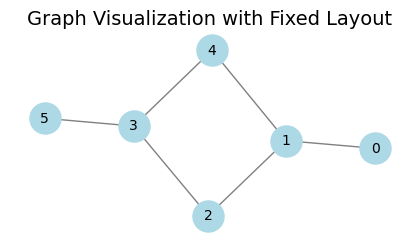

In [56]:
max_value_protocol = 80

# Load the CSV file
absolute_path = "/media/jc-user/My Box/Universidad Carlos III de Madrid/Coding/ONDM2025/network_topologies/"
data = pd.read_csv(absolute_path + "6_nodes_SECOQC.csv", header=None)

# Ensure the data has at least 700 rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Initialize the set N
N = set()

# Initialize the set E
E = []

# Initialize the set E
L = {}

# Iterate through rows and check
for index, row in data.iterrows():
    # Check if any value in the row is non-zero
    if (row != 0).any():
        N.add(index)
    
    # Check each column value in the current row
    for col_index, value in enumerate(row):
        if value != 0:
            if index < col_index:
                E.append((index, col_index))  # Add the (row, column) tuple to E
                L[(index, col_index)] = value  # Add the (row, column):value tuple to L

# Normalize values in L
max_value = max(L.values())  # Find the maximum value in L

# If the maximum value is greater than 0, normalize it
if max_value > max_value_protocol:
    scaling_factor = max_value_protocol / max_value
    L = {key: round(value * scaling_factor,4) for key, value in L.items()}  # Normalize each value


# Output network data
print("Number of nodes = " +str(len(N)))
print("N = " + str(N))
print("Number of edges = " +str(len(E)))
print("E = " + str(E))
print("Longest distance in the network = " +str(max(L.values())) + " km")
print("L = " + str(L))

# Create the graph
G = nx.Graph()
G.add_nodes_from(N)  # Add nodes
G.add_edges_from(E)  # Add edges

# Find the maximum degree
max_degree = max(dict(G.degree()).values())

print("Maximum degree of the graph:", max_degree)

degrees = dict(G.degree())
avg_degree_calc = sum(degrees.values()) / len(degrees)
print("Average degree:", avg_degree_calc)


# Generate fixed positions
fixed_pos = nx.spring_layout(G, seed=42)  # Use a random seed for consistent layout

# Draw the graph with fixed positions
plt.figure(figsize=(4, 2))
nx.draw(
    G, 
    fixed_pos, 
    with_labels=True, 
    node_color="lightblue", 
    edge_color="gray", 
    node_size=500, 
    font_size=10
)
plt.title("Graph Visualization with Fixed Layout", fontsize=14)
plt.show()  

In [57]:
print("This code is made for Allocation-Aware Round Robin Scheduler (AaRRS)")
print("------------------------------------")
print(" ")

#Initializing timing
time_0 = time()

AaRRS_solution = {}

##########-------------------->>>>>>>>>> TOPOLOGIES <<<<<<<<<<---------------------##########
#Initializing variables and sets
SKR_nTDM = {}   #SKR for non TDM QChs  
SKR_TDM = {}    #SKR for switched TDM QChs (worst case, two switches in the QCh)

T = 1800    #Time period for TDM cycle
ts = 180    #Time for switching and recalibration, inherent to QKD devices technology

stx = round(ts/T, 3)

tf = {edge: 0 for edge in E} #Traffic matrix

#Computing the maximum number of slots 
if T/ts == np.floor(T/ts):
        d_max = T/ts - 1
else:
        d_max = int(np.floor(T/ts))

d_max = int(d_max)

#Computing the SKR for non TDM QChs and TDM QChs
for key, value in L.items():
    SKR_nTDM[key] = skr.compute_skr(value,0,256)
    SKR_TDM[key] = skr.compute_skr(value,2.4,256)

aux_N = N
aux_E = E

mean_skr = np.mean(list(SKR_nTDM.values()))

#Setting the values to start the iteration
N = aux_N
E = aux_E

G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(E)

#Creating the traffic matrix
tf = {(i,j): round(random.uniform(mean_skr*0.01,mean_skr)) for (i,j) in E}
print("Traffic matrix: " + str(tf))

#Removing the entire part of the rate Demand/Capacity, this may lead to a different network topo 
aux1 = {}
aux2 = []
direct_pairs = {(i,j): 0 for (i,j) in E}    #The number of non TDM QChs for links
for (i,j) in E:
        #Computing the remainder of non TDM QChs
        remainder_nTDM = round(tf[(i,j)]/SKR_nTDM[(i,j)] - np.floor(tf[(i,j)]/SKR_nTDM[(i,j)]),3)

        #Checking if the remainder using a SKR for TDM plus the contribution of switching is viable to by shared 
        if (SKR_nTDM[(i,j)]/SKR_TDM[(i,j)])*remainder_nTDM + ts/T  > 1:
                direct_pairs[(i,j)] = np.ceil(tf[(i,j)]/SKR_nTDM[(i,j)])     
        
        #If so, then update the corresponding values 
        else:
                direct_pairs[(i,j)] = np.floor(tf[(i,j)]/SKR_nTDM[(i,j)])
                if (SKR_nTDM[(i,j)]/SKR_TDM[(i,j)])*remainder_nTDM != 0:
                        aux1[(i,j)] = (SKR_nTDM[(i,j)]/SKR_TDM[(i,j)])*remainder_nTDM
                        aux2.append((i,j))

#Updating the main sets 
tf = aux1.copy()

E = aux2
N = [n for n in N if n in [element for (i,j) in E for element in (i,j)]]

#Building the resulted topo
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(E)

capacity_installed = {}
saturation_degree = {n: 0 for n in N}

# Adjusting the parameters
max_iter = 10000  # Increase the maximum number of iterations
tol = 1e-06  # Decrease the tolerance level
nstart = {n: 1.0 for n in G.nodes()}  # Provide an initial guess
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol, nstart=nstart)

uncolored = [k for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)]

while uncolored:
        if len(capacity_installed) == 0:
                # Choose the vertex with the highest degree initially
                n = max(uncolored)
        else:
                # Choose the vertex with the highest saturation degree, breaking ties by eigenvector_centrality
                n = max(uncolored, key=lambda x: (saturation_degree[x], eigenvector_centrality[x]))

        # Determine the smallest color not used by the neighbors of n
        neighbor_colors = [capacity_installed[ng] for ng in G.neighbors(n) if ng in capacity_installed]
        for col in [0,1]:
                if col not in neighbor_colors:
                        capacity_installed[n] = col
                        break

        if n not in capacity_installed:
                capacity_installed[n] = 2

        uncolored.remove(n)
        # Update the saturation degrees of the neighbors of n
        for ng in G.neighbors(n):
                if ng in uncolored:
                        unique_colors = [capacity_installed[n] for n in G.neighbors(ng) if n in capacity_installed]
                        saturation_degree[ng] = len(unique_colors)

Tx = [n for n in N if capacity_installed[n] in {0,2}]
Rx = [n for n in N if capacity_installed[n] in {1,2}]

# Rebuild E satisfying the conditions
E = [(n,ng) for n in N for ng in G.neighbors(n) 
        if capacity_installed[n] in {0,2} and capacity_installed[ng] in {1,2}]

#print("Non swiched Qx pairs = " + str(direct_pairs))

new_tf = {(i,j):0 for (i,j) in E}
for (i,j), value in tf.items():
        # Check if the key or its reverse is in pairs_list
        if (i,j) in E:
                new_tf[(i,j)] = round(value,3)
        elif (j,i) in E:
                new_tf[(j,i)] = round(value,3)  # Reverse the ke
tf = new_tf.copy()


# Build the new topo  
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(E)

max_dev_node_x = {n: sum(1 for ng in G.neighbors(n)) for n in Tx}
max_dev_node_y = {n: sum(1 for ng in G.neighbors(n)) for n in Rx}

K = np.arange(1, d_max + 1)
        
X = {n: np.arange(1,max_dev_node_x[n] + 1) for n in Tx}  
        
Y = {n: np.arange(1,max_dev_node_y[n] + 1) for n in Rx}

max_dev_node = max(max(max_dev_node_x.values()),max(max_dev_node_y.values()))

# Adjusting the parameters
max_iter = 10000  # Increase the maximum number of iterations
tol = 1e-06  # Decrease the tolerance level
nstart = {n: 1.0 for n in G.nodes()}  # Provide an initial guess
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol, nstart=nstart)

total_node_demand = {n: 0 for n in G.nodes()}

for (u,v), value in tf.items():
        total_node_demand[u] += value
        total_node_demand[v] += value

score = {n: round(total_node_demand[n]*eigenvector_centrality[n],4) for n in N}
unvisited = [k for k, v in sorted(score.items(), key=lambda item: item[1], reverse=True)]

def round_robin_scheduler(unvisited, E, tf):
        """
        Perform Round Robin scheduling on a list of nodes with devices and traffic matrix. 
        
        Parameters:
        unvisited: List of nodes, each containing devices
        E: edges of the graph
        tf: traffic matrix
        
        Returns:
        devices per node, and its scheduling
        """
        visited_edges = []

        # Initialize devices per node and scheduling
        # 0 Qx inactive, 1 active
        dx = {(n,x): 0 for n in Tx for x in X[n]} 
        dy = {(n,y): 0 for n in Rx for y in Y[n]}
        schedule_x = {(n,x): [] for n in Tx for x in X[n]}
        schedule_y = {(n,y): [] for n in Rx for y in Y[n]}

        for n in unvisited:
                # Order the edges according to the maximum traffic flow
                if n in Tx:
                        edges = sorted([(i,j) for (i,j) in E if i == n and (i,j) not in visited_edges], key=lambda edge: tf.get(edge, 0), reverse=True)
                else:
                        edges = sorted([(i,j) for (i,j) in E if j == n and (i,j) not in visited_edges], key=lambda edge: tf.get(edge, 0), reverse=True)

                # Update visited edges
                if len(edges) != 0:
                        for (i,j) in edges:
                                visited_edges.append((i,j))

                # Iterate over the edges
                for (i,j) in edges:
                        slot_found = False  # Flag to indicate if a suitable slot has been found
                        #if n in Rx and not slot_found:
                        # Iterate over Y for Rx nodes
                        for y in Y[j]:
                                set_slots_rx = find_free_slots(schedule_y[(j,y)])  # Find free slots for Rx schedule

                                for slot_rx in set_slots_rx:
                                        # Check if the slot is large enough for the transmission and if a slot hasn't been found yet
                                        if slot_rx[1] - slot_rx[0] >= (stx + tf[(i, j)]) and not slot_found:
                                                # Iterate over X for Tx nodes
                                                for x in X[i]:
                                                        set_slots_tx = find_free_slots(schedule_x[(i,x)])  # Find free slots for Tx schedule

                                                        for slot_tx in set_slots_tx:
                                                                # Check if the slot is large enough for the transmission and if a slot hasn't been found yet
                                                                # and if the start time of the slot matches for both Rx and Tx
                                                                if max(slot_tx[0],slot_rx[0]) + stx + tf[(i,j)] <= min(slot_tx[1],slot_rx[1]) and not slot_found:
                                                                        dy[(j,y)] = 1  # Mark the (n, y) pair as scheduled
                                                                        dx[(i,x)] = 1  # Mark the (i, x) pair as scheduled
                                                                        
                                                                        # Schedule the slot for the Rx node
                                                                        schedule_y[(j,y)].append((max(slot_tx[0],slot_rx[0]), round(max(slot_tx[0],slot_rx[0]) + stx + tf[(i,j)], 3)))
                                                                        # Schedule the slot for the Tx node
                                                                        schedule_x[(i,x)].append((max(slot_tx[0],slot_rx[0]), round(max(slot_tx[0],slot_rx[0]) + stx + tf[(i,j)], 3)))
                                                                        slot_found = True  # Set the flag to indicate that a suitable slot has been found
                                                                        break  # Break out of the innermost loop

                                                        if slot_found:
                                                                break  # Break out of the second innermost loop

                                if slot_found:
                                        break  # Break out of the outermost loop
                        

        return dx, dy, schedule_x, schedule_y
        
def find_free_slots(transceiver_schedule):
        transceiver_schedule.sort()
        free_slots = []
        current_start = 0

        for start, end in transceiver_schedule:
                if start > current_start:
                        free_slots.append((current_start, start))
                current_start = max(current_start, end)
        
        if current_start < 1:
                free_slots.append((current_start, 1))

        return free_slots

rst = round_robin_scheduler(unvisited, E, tf)
dx, dy, sch_x, sch_y = rst[0],rst[1],rst[2],rst[3]

if sum(dx[(n,x)] for n in Tx for x in X[n]) <= sum(dy[(n,y)] for n in Rx for y in Y[n]):
        # Swap dx and dy
        dx, dy = dy, dx
        # Swap sh_x and sh_y
        sch_x, sch_y = sch_y, sch_x
        # Swap Tx and Rx
        Tx, Rx = Rx, Tx
        # Swap E
        E = [(b, a) for a, b in E]

time_f = time()

my_sol = (round(time_f - time_0,4),
        0.5*(sum(direct_pairs.values()) + sum(dx.values())) + (sum(direct_pairs.values()) + sum(dy.values())),
        2*sum(direct_pairs.values()) + sum(dx.values()) + sum(dy.values()),
        sum(direct_pairs.values()) + sum(dx.values()),
        sum(direct_pairs.values()) + sum(dy.values()))

print("AaRRS solution")
print(f"Sol ==> Runtime: {my_sol[0]}, Cost: {my_sol[1]}, Total: {my_sol[2]}, Tx: {my_sol[3]}, Rx: {my_sol[4]}")
tm.sleep(5)
print(" ")

This code is made for Allocation-Aware Round Robin Scheduler (AaRRS)
------------------------------------
 
Traffic matrix: {(0, 1): 1751, (1, 2): 106, (1, 4): 339, (2, 3): 1803, (3, 4): 2692, (3, 5): 1007}
AaRRS solution
Sol ==> Runtime: 0.0023, Cost: 45.5, Total: 61.0, Tx: 31.0, Rx: 30.0
 


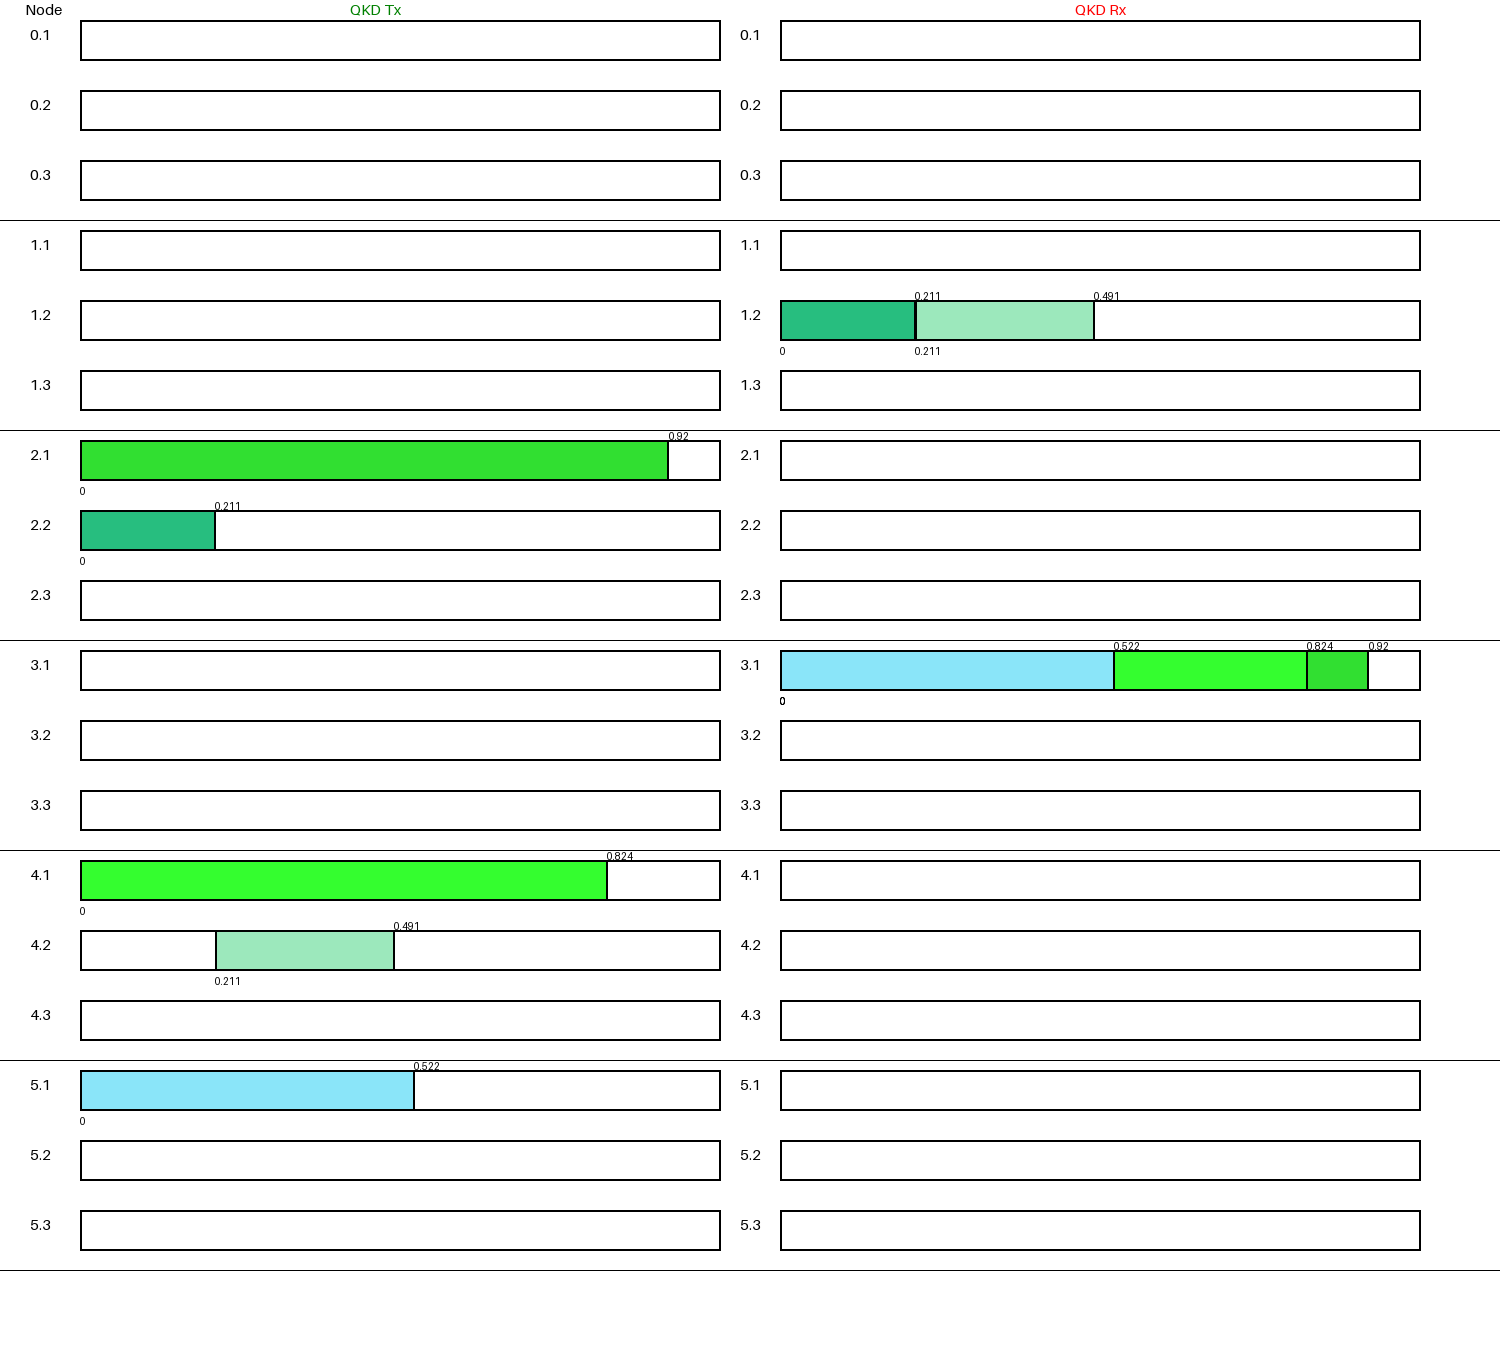

In [58]:
drawing_scheduling(sch_x,sch_y)                            